In [82]:
#Importing libraries

import pandas as pd
import seaborn as sea
import time
import numpy as np
import matplotlib.pyplot as  plt

In [43]:
dataset = pd.read_csv('uber-raw-data-may14.csv')
data = dataset.copy()
data.head(10)

,Date/Time,Lat,Lon,Base
0,5/1/2014 0:02:00,40.7521,-73.9914,B02512
1,5/1/2014 0:06:00,40.6965,-73.9715,B02512
2,5/1/2014 0:15:00,40.7464,-73.9838,B02512
3,5/1/2014 0:17:00,40.7463,-74.0011,B02512
4,5/1/2014 0:17:00,40.7594,-73.9734,B02512
5,5/1/2014 0:20:00,40.7685,-73.8625,B02512
6,5/1/2014 0:21:00,40.7637,-73.9962,B02512
7,5/1/2014 0:21:00,40.7252,-74.0023,B02512
8,5/1/2014 0:25:00,40.7607,-73.9625,B02512
9,5/1/2014 0:25:00,40.7212,-73.9879,B02512


In [14]:
data.info() # 20 MB 652435 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652435 entries, 0 to 652434
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  652435 non-null  object 
 1   Lat        652435 non-null  float64
 2   Lon        652435 non-null  float64
 3   Base       652435 non-null  object 
dtypes: float64(2), object(2)
memory usage: 19.9+ MB


In [18]:
datetime = '4/1/2014 1:01:00'

In [36]:
pd.to_datetime(datetime)

Timestamp('2014-04-01 01:01:00')

In [46]:
##Convert datetime and add some useful columns
data['Date/Time']= pd.to_datetime(data['Date/Time'])
data.head(10)

,Date/Time,Lat,Lon,Base
0,2014-05-01 00:02:00,40.7521,-73.9914,B02512
1,2014-05-01 00:06:00,40.6965,-73.9715,B02512
2,2014-05-01 00:15:00,40.7464,-73.9838,B02512
3,2014-05-01 00:17:00,40.7463,-74.0011,B02512
4,2014-05-01 00:17:00,40.7594,-73.9734,B02512
5,2014-05-01 00:20:00,40.7685,-73.8625,B02512
6,2014-05-01 00:21:00,40.7637,-73.9962,B02512
7,2014-05-01 00:21:00,40.7252,-74.0023,B02512
8,2014-05-01 00:25:00,40.7607,-73.9625,B02512
9,2014-05-01 00:25:00,40.7212,-73.9879,B02512


In [80]:
#Get Day of the Month

def get_dom(dt):
    return dt.day


def get_weekday(dt):
    return dt.weekday()


def get_hour(dt):
    return dt.hour

data['DoM'] = data['Date/Time'].map(get_dom)
data['Weekday'] = data['Date/Time'].map(get_weekday)
data['Hour'] = data['Date/Time'].map(get_hour)

data.head()

,Date/Time,Lat,Lon,Base,DoM,Weekday,Hour
0,2014-05-01 00:02:00,40.7521,-73.9914,B02512,1,3,0
1,2014-05-01 00:06:00,40.6965,-73.9715,B02512,1,3,0
2,2014-05-01 00:15:00,40.7464,-73.9838,B02512,1,3,0
3,2014-05-01 00:17:00,40.7463,-74.0011,B02512,1,3,0
4,2014-05-01 00:17:00,40.7594,-73.9734,B02512,1,3,0


Text(0.5, 1.0, 'Frequency by Date - Uber - May 2014')

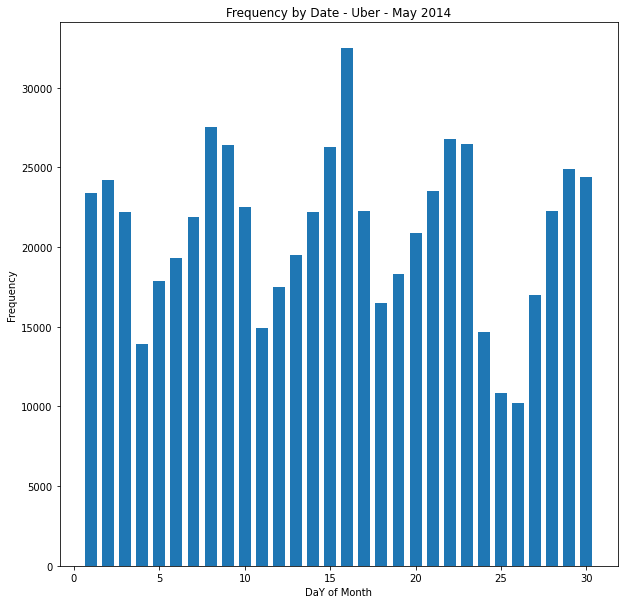

In [128]:
# Showing data on histogram


plt.figure(figsize=(10,10))
plt.hist(data.DoM, bins=30, rwidth=0.7, range=(0.5, 30.5))
plt.xlabel('DaY of Month')
plt.ylabel('Frequency')
plt.title('Frequency by Date - Uber - May 2014')

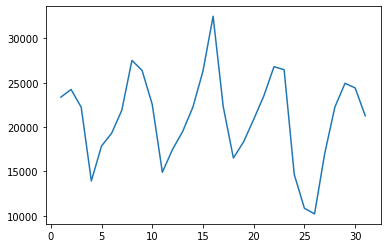

In [102]:
# print((k, len(rows)))

def countRows(rows):
    return len(rows)
by_day = data.groupby('DoM').apply(countRows)
plt.plot(by_day)

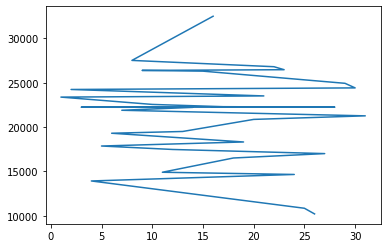

In [112]:
by_day_sorted = by_day.sort_values()
plt.plot(by_day_sorted)



ValueError: The number of FixedLocator locations (30), usually from a call to set_ticks, does not match the number of ticklabels (31).

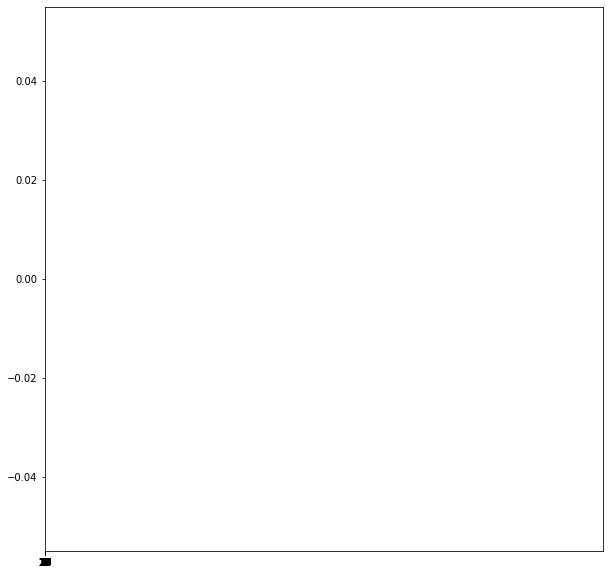

In [161]:


plt.figure(figsize=(10, 10))
plt.bar(range(1, 31), by_day_sorted)
plt.xticks(range(1, 31), by_day_sorted.index)
plt.xlabel('date of the month')
plt.ylabel('frequency')


Text(0.5, 1.0, 'Frequency by Hour - Uber - May 2014')

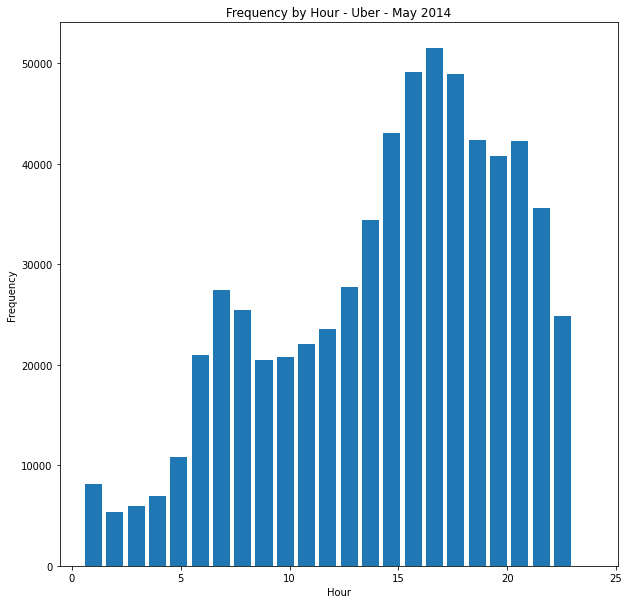

In [137]:
plt.figure(figsize=(10, 10))
plt.hist(data.Hour,bins=24,rwidth=0.8, range=(.5, 24))
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Frequency by Hour - Uber - May 2014')

Text(0.5, 1.0, 'Frequency by Weekday - Uber - May 2014')

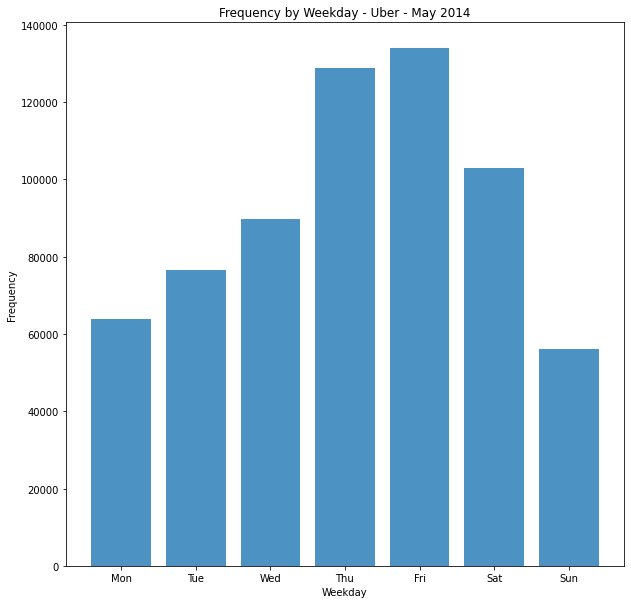

In [135]:
plt.figure(figsize=(10, 10))
plt.hist(data.Weekday, bins=7, range =(-.5,6.5), rwidth=.8, alpha=.8)
plt.xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
plt.xlabel('Weekday')
plt.ylabel('Frequency')
plt.title('Frequency by Weekday - Uber - May 2014')

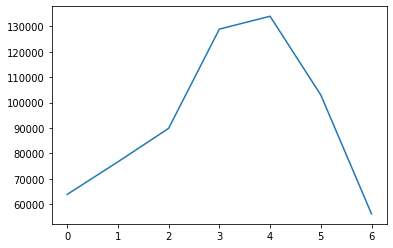

In [156]:
by_weekday = data.groupby('Weekday'.split()).apply(countRows)
plt.plot(by_weekday)

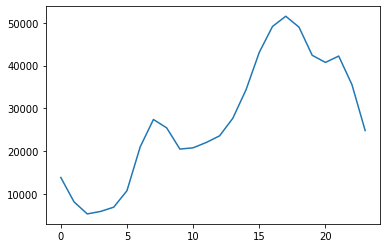

In [155]:

by_hour = data.groupby('Hour'.split()).apply(countRows)
plt.plot(by_hour_weekday)

In [158]:

by_hour_weekday = data.groupby('Hour Weekday'.split()).apply(countRows).unstack()
by_hour_weekday



Weekday,0,1,2,3,4,5,6
Hour,,,,,,,
0,767,715,838,1426,2004,3878,4247
1,466,431,477,831,1156,2249,2576
2,304,303,334,584,758,1524,1565
3,627,543,573,849,1005,1205,1144
4,977,864,846,1291,1286,958,723
5,1514,1631,1547,2425,2025,1027,620
6,2688,3416,3618,5080,4327,1203,683
7,3287,4401,4864,6697,5665,1588,911
8,3012,3616,4046,6318,5072,2144,1252


<AxesSubplot:xlabel='Weekday', ylabel='Hour'>

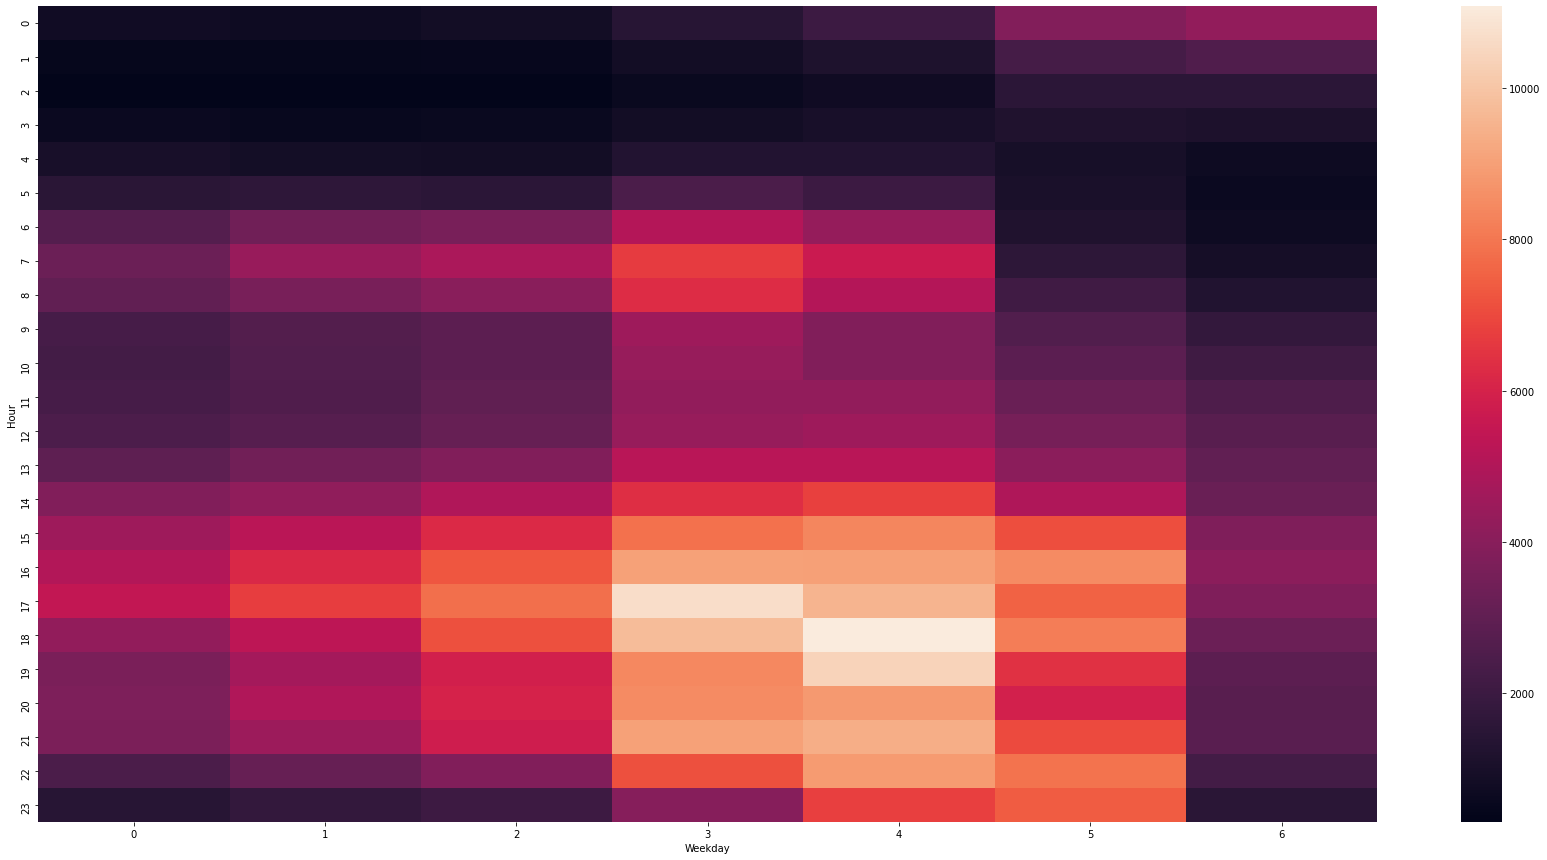

In [160]:
plt.figure(figsize=(30, 15))
seaborn.heatmap(by_hour_weekday)